### Parking Lot of an Italian Restaurant 

We are in search of the best neighborhood in Pittsburgh to build a parking lot for an Italian restaurant. Our criteria include: it must have proximity to some trees that are in "good" or "very good" condition, a community willing to look out for each other by reporting in 311 calls (get those potholes out of here!) and lastly, access to either convenience stores or supermarkets to uh, get a fairly priced can of pop before spending 30 dollars on a plate of pasta. 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Just Popping in - A Look at Access to Food and Convenience Items - Supermarkets and Convience Stores in Pittsburgh 

With access to a supermarket market or convenience store, those who park in our lot will be able to buy anything they need during a long car trip, use a restroom in case of an emergency, getting skittles to eat while kicking back with their friends out of the trunk of their car, or dining at a fine Italian restaurant. We aim to provide close drive or walk for our patrons so they find our lot convenient. 

As we look for convenience stores and supermarkets to satiate the needs of those parking in our lot, we delve into sorting the data in the table. The important data we need from the table includes the zipcode of the areas as well as the count of convenience stores or supermarkets they have. The list of zipcodes will help us identify what is the breadth of area we are looking at in order to find the most opportune place to pave our lot. 


In [3]:
supAndCon = pd.read_csv("data-conveniencesupermarkets.csv", sep=",", dtype = str)
supAndCon.head(3)

,Client ID,Name,Legal Name,Start Date,Street #,Street Name,State,Zip,Lat,Lon,Accuracy,Category
0,201211150002,Avalon Fuel,Avalon Fuel Company,10/26/2012,901,Ohio River Blvd,PA,15202,40.495759,-80.066508,9,Convenience Store
1,201511040005,Ez Energy #303/7Eleven #36183H,Neelkanth Ansh Enterprises Inc,10/26/2015,209,Ohio River Blvd,PA,15143,40.545418,-80.194152,9,Convenience Store
2,201212130003,EZ Energy #311 / 7 Eleven #36191H,7 Eleven Inc,12/3/2012,8136,Ohio River Blvd,PA,15202,40.510522,-80.094268,9,Convenience Store


In [5]:
df = pd.DataFrame(supAndCon.iloc[:, np.r_[7,11]])
count = df.groupby(['Zip', 'Category']).size().to_frame().reset_index().rename(columns={0:"amount"})
count_total = df.groupby(['Zip']).size().to_frame().reset_index().rename(columns={0:"amounts"})
print("The median amount of supermarkets and convenience stores is " + str(count_total['amounts'].median()))
print("The mean amount of supermarkets and convenience stores is " + str(count_total['amounts'].mean()))

The median amount of supermarkets and convenience stores is 6.0
The mean amount of supermarkets and convenience stores is 7.455555555555556


### Horizontal Bar Graph of Total Supermarkets and Convenience Stores per Zipcode

<Figure size 432x288 with 0 Axes>

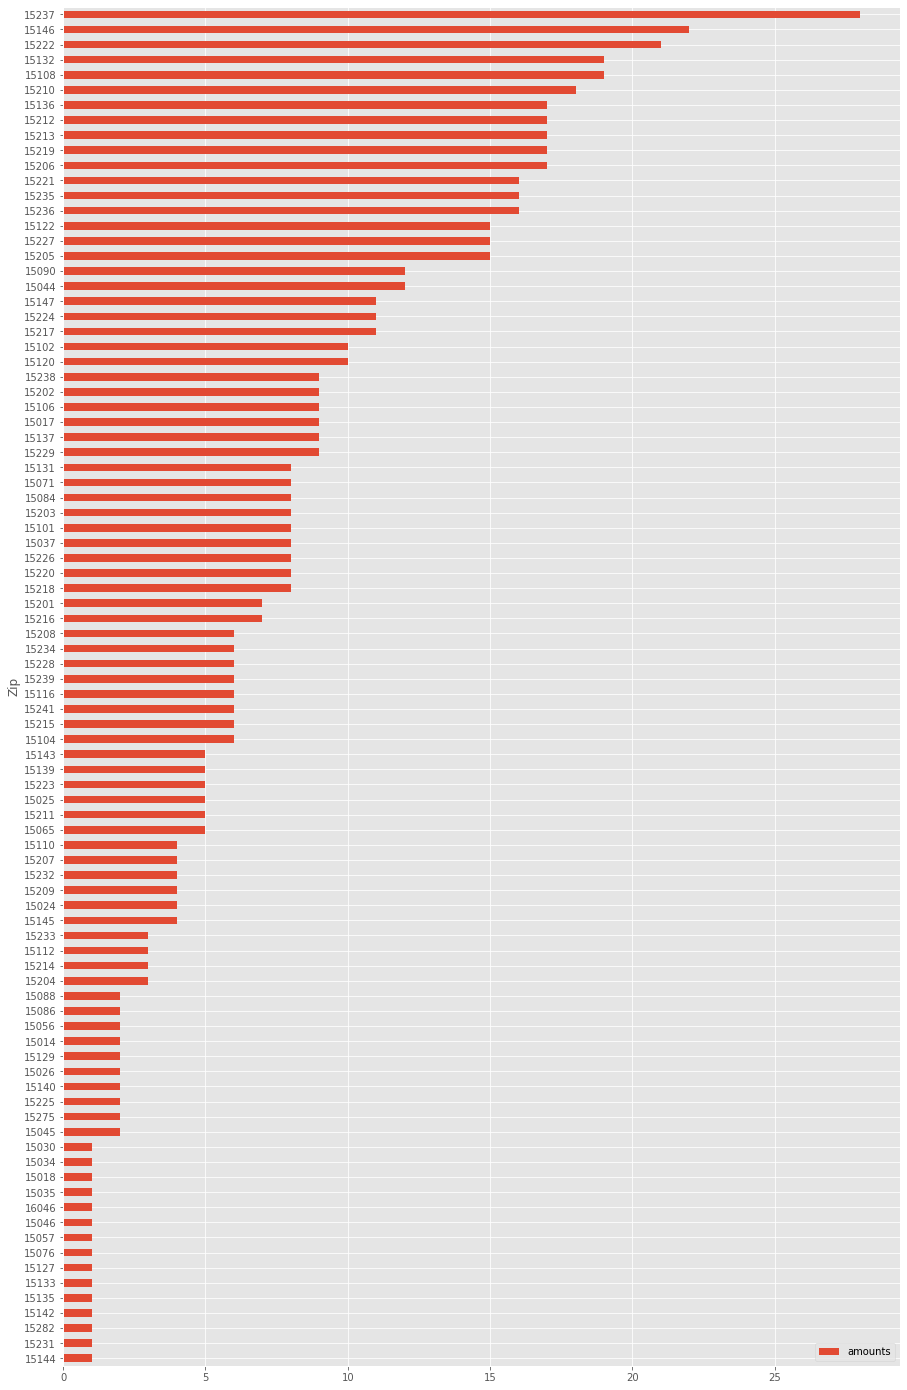

In [6]:
plt.tight_layout()
plt.style.use("ggplot")
chart_values = count_total[count_total["amounts"] > 0].sort_values('amounts')
chart_values.plot.barh(x="Zip",y="amounts",figsize=(15,25))
plt.savefig("zipVStores.png")

### Supermarkets vs Convenience Stores

What are the amount of supermarkets compared to convenience stores?

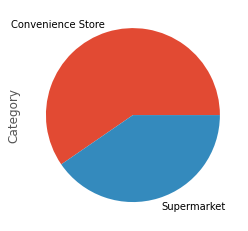

In [7]:
count["Category"].value_counts().sort_index().plot.pie(y='Category', subplots=False, figsize=(8, 4))

### Convenience Store and Supermarket Data Conclusion

In the Suburbs:
- 15237 --> Franklin Park, Townships of Ross & McCandless

Highest ranked in the City: 
- 15146 --> Monroeville
- 15222 --> Downtown
- 15132 --> McKeesport
- 15108 --> Coraopolis

The Overall Choice Between the Three Submetrics: 
- 15217 --> Squirrel Hill South

The median amount of convenience stores and supermarkets combined is 6, and the mean is 7.5. We are then able to conclude that neighborhoods with a higher amount than 7 has a higher than average amount of spots for folks to buy whatever they need, and return to our parking lot! 

The best neighborhoods for overall access to a store is Franklin Park and the Townships of Ross and McCandless. However, these are neighborhoods located outside of the Pittsburgh city area and are in the greater Pittsburgh area. Located in the suburbs of Pittsburgh, it's the clear winner. 

Next is Monroeville followed by downtown, McKeesport and Coraopolis. These neighborhoods have the highest convenience level to acquiring food, as I looked at total counts on accessibility.

For parking lot purposes, we take into account the amount of 311 calls, as well the amount of healthy trees in the area. These data point to Squirrel Hill South being the best area for our parking lot, and the Supermarket and Convenience Store data can support this by showing that the 15217 zipcode containing Squirrel Hill has 11 supermarkets and convenience stores. This is fifty percent higher than the average neighborhood! 

### Decisions, Decisions. 

We have decided to put our parking lot in the neighborhood of Squirrel Hill South. Our runner up location being in the South Side Flats. We chose this location because of it's high number of "good" or "very good" trees, 11 shoppable supermarkets/convenience stores as well as the appreciable volume of 311 calls. 